# Clean and Analyze Employee Exist Survey

## Project Description:
The goal of the project is to analyze the reasons why employees leave their work positions at  Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. We will single out the reasons for exit depending on:
* Time spent at the position
* Age of the employee.

The data is obtained from DETE and TAFE surveys. The format of the survey data is the following:
 dete_survey.csv:
* ID: An id used to identify the participant of the survey
* SeparationType: The reason why the person's employment ended
* Cease Date: The year or month the person's employment ended
* DETE Start Date: The year the person began employment with the DETE

tafe_survey.csv:
*R ecord ID: An id used to identify the participant of the survey
* Reason for ceasing employment: The reason why the person's employment ended
* LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)


### Import Data

In [541]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

### Brief look at the data

In [542]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             822 non-null object
DETE Start Date                        822 non-null object
Role Start Date                        822 non-null object
Position                               817 non-null object
Classification                         455 non-null object
Region                                 822 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work environ

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [543]:
tafe_survey.info()
tafe_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4


In [544]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [545]:
tafe_survey.isnull().sum()

Record ID                                                                                                                                                          0
Institute                                                                                                                                                          0
WorkArea                                                                                                                                                           0
CESSATION YEAR                                                                                                                                                     7
Reason for ceasing employment                                                                                                                                      1
Contributing Factors. Career Move - Public Sector                                                                                                                265
Contributi

We see that the TAFE survey has plenty of NULL values as well as "-" values. We will have to consider the following:
* Are the columns with large number of NaN necessary?
* To what will we convert the "-" answers?
* The TAFE data has 7 NaN CESATION YEAR values and 106 "LengthofServiceOverall" and "LengthofServiceCurrent" values.
* The TAFE and DETE format the time of start and finish differently. The dates in some cases are in object type in other in float64

## Equivalence table between DETE and TAFE

| dete_survey  | tafe_survey  | Definition  |
|---|---|---|
| ID  |  	Record ID  |  	An id used to identify the participant of the survey  |
| SeparationType  |   	Reason for ceasing employment | The reason why the participant's employment ended |
|  Cease Date |  	CESSATION YEAR  |  	The year or month the participant's employment ended  |
|  DETE Start Date |   |  	The year or month the participant's employment ended   |
|  |  	LengthofServiceOverall.Overall Length of Service at Institute (in years) | The length of the person's employment (in years) |
| Age  | CurrentAge.Current Age  | The age of the participant  |
|  Gender | Gender.What is your Gender?  | The gender of the participant  |

## First clean up cycle
We proceed to do a few data cleaning steps.
The steps in the "dete_survey.csv" data are the following:
* In ""DETE Start Time" there are "Not Started" values: We proceed to substitute them with NaN
* Columns from 28 to 48 are  not necessary for our goal: We proceed to drop them

The steps in the "tafe_survey.csv" data are the following:
* In TEFE the columns 17-65 are not required: therefore we will dropt them too

In [546]:
# reload and transform dete_survey
dete_survey = pd.read_csv("dete_survey.csv", na_values="Not Stated")
columns_to_drop = dete_survey.columns[28:49]
dete_survey_updated = dete_survey.drop(columns = columns_to_drop)

# transform tafe_survey
columns_to_drop = tafe_survey.columns[17:66]
tafe_survey_updated = tafe_survey.drop(columns=columns_to_drop)

## Second Clean Up cycle
We proceed to rename the columns in both dataframes such that:
* Have only lower case
* No starting or trailing spaces, and spaces swapped with "_"
* Identical name of columns in both dataframes for: id, gender , age, cease_date, separationtype
* Change TAFE columns as follows:
    * 'Employment Type. Employment Type': 'employment_status'
    * 'Classification. Classification': 'position'
    * 'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service'
    * 'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'

In [547]:
# Swap points by spaces, convert to lower case
dete_orig_columns = dete_survey_updated.columns
dete_new_columns = dete_orig_columns.str.replace(".", " ").str.lower()
# Remove starting and trailing spaces, remove more than 1 space, send spaces to "_" 
dete_new_columns = dete_new_columns.str.strip().str.replace(r"\s+", " ").str.replace(" ","_")
dete_column_dict = {}
for i in range(len(dete_orig_columns)):
    dete_column_dict[dete_orig_columns[i]] = dete_new_columns[i]

dete_survey_updated.rename(columns=dete_column_dict, inplace=True)

# Change the columns in TAFE data according to the equivalence table between data
tafe_column_dict = {
                    "Record ID": "id",
                    "CESSATION YEAR": "cease_date",
                    "Reason for ceasing employment": "separationtype",
                    "Gender. What is your Gender?": "gender",
                    "CurrentAge. Current Age": "age",
                    "Employment Type. Employment Type": "employment_status",
                    "Classification. Classification": "position",
                    "LengthofServiceOverall. Overall Length of Service at Institute (in years)": "institute_service",
                    "LengthofServiceCurrent. Length of Service at current workplace (in years)": "role_service"
                   }
tafe_survey_updated.rename(columns=tafe_column_dict, inplace=True)

In [548]:
# head the new data
dete_survey_updated.head(1)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes


In [549]:
# head the new data

tafe_survey_updated.head(1)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2


## Create new dataframes with cleaned data
We create the dataframes:
* dete_resignations
* tafe_resignations

We will add onto these dataframes the most important and cleaned data fields. In our case, the relevant columns will be:
* cease_date
* age
* institution_service
* dissatisfied

In [550]:
# Start by cleaning the cease_date from both data sources
dete_resignations = dete_survey_updated["cease_date"].str.extract(r"(?P<cease_date>[12][0-9][0-9][0-9])", expand=True).astype("float")
tafe_resignations = tafe_survey_updated.loc[:,["cease_date", "institute_service"]]
tafe_resignations["cease_date"] = tafe_resignations["cease_date"].astype("float")

## Search for inconsistencies in the data 
We will focus on inconsistencies in the cease_date and dete_start_date.
We observed that in "dete_survey.csv", some cease_date are with the year format and other with the month also as 03/2017. Then we convert the month format into year format.

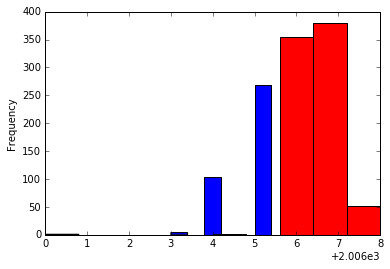

In [551]:
tafe_resignations["cease_date"].plot.hist()
dete_resignations["cease_date"].plot.hist(color='red')

The data seems reasonable, all the cease_dates are after start_dates for the DETE data.

## Transform the data regarding start date and time working at the position


In [552]:
# We proceed tp add the institution service (time worked) column to the dataframe
dete_resignations["institute_service"] = (dete_resignations["cease_date"] 
                                          -dete_survey_updated["dete_start_date"].astype("float")).astype("str")

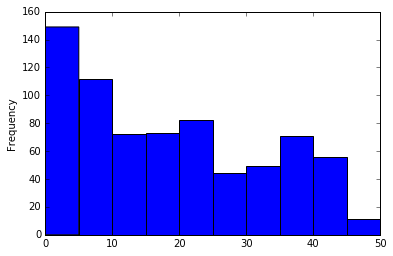

In [553]:
# DETE survey working times before resignation
dete_resignations["institute_service"].astype("float").plot.hist()
plt.show()

The total work in the same position is under 40 years, which makes it feasable.

## Clean up of Dissatisfaction data


In [554]:
# check how the values in the TAFE data Dissatisfaction columns look like
tafe_survey_updated["Contributing Factors. Dissatisfaction"].value_counts()

-                                         371
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [555]:
# check how the values in the DETE data Dissatisfaction columns look like
dete_survey_updated["job_dissatisfaction"].value_counts()

False    733
True      89
Name: job_dissatisfaction, dtype: int64

In [556]:
def update_vals(colval):
    if pd.isnull(colval):
        return np.nan
    elif colval == "-":
        return False
    else:
        return True
    
tafe_resignations["dissatisfied"] = tafe_survey_updated[["Contributing Factors. Dissatisfaction", 
                                                          "Contributing Factors. Job Dissatisfaction"]
                                                        ].applymap(update_vals).any(axis=1, skipna=False)
dete_resignations["dissatisfied"] = dete_survey_updated[["job_dissatisfaction", 
                                                          "dissatisfaction_with_the_department", 
                                                          "physical_work_environment", 
                                                          "lack_of_recognition", 
                                                          "lack_of_job_security", 
                                                          "work_location", 
                                                          "employment_conditions", 
                                                          "work_life_balance",
                                                          "workload"]
                                                        ].any(axis=1, skipna=False)

Here we created a new column "dissatisfied " in tafe_resignations that summarizes if the employee was satisfied or not.
For that, if any of the dissatisfaction fields are True, we assign True to dissatisfaction. In the tafe_registrations, the string "-" is interpreted as dissatiscaftion = False, any other answer is considered as dissatiscaftion = True.

In [557]:
# We make copoies of the registrations data frames
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

In [558]:
tafe_resignations["dissatisfied"].value_counts(dropna=False)

False    322
NaN      265
True     115
Name: dissatisfied, dtype: int64

We see that TAFE has a large number of NaN as answer to dissatisfaction. We deal with that later on.

### Tramsform the age column
The age column in both data sources comes in a differnt format. The age groups are almost the same. There are the following differences between the two data:
* in TAFE there is "56 or older"
* in DETE there is "56-61" and "61 or older"
* in DETE "26-30" format and in TEFE both "26-30" and "26  30" formats.


In [559]:
tafe_survey_updated["age"].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: age, dtype: int64

In [560]:
dete_survey_updated["age"].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: age, dtype: int64

Transform the "age" columns and add them to combined_updated. We do the following changes in format:
* Age in the format "51-55"
* Combine 56-60 and 61 or older into 56 or older
* keep 56 or older and 20 or younger classifications

In [561]:
# transform dete ages
dete_resignations_up["age"] = dete_survey_updated["age"].str.strip().str.replace(r"\s+", " ").str.lower()
dete_resignations_up.loc[(dete_resignations_up["age"] == "56-60"), "age"] = "56 or older"
dete_resignations_up.loc[(dete_resignations_up["age"] == "61 or older"), "age"] = "56 or older"
dete_resignations_up["age"] = dete_resignations_up["age"].str.replace(" ", "-")
# transform tafe ages
tafe_resignations_up["age"] = tafe_survey_updated["age"].str.strip().str.replace(r"\s+", " ").str.lower()
tafe_resignations_up["age"] = tafe_resignations_up["age"].str.replace(" ", "-")
# 
#dete_resignations["age"].size
#age_dete.size
#dete_resignations["new_age"] = age_dete["age"]
#tafe_resignations["age"] = age_tafe
dete_resignations_up["age"].sort_values().unique() == tafe_resignations_up["age"].sort_values().unique()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
       False])

### Merging of dataframes from DETE and TAFE
We keep the source of the data by adding an additional column named "institute". From now on we continue using the copies of the dataframes dete_resignations_up, tafe_resignations_up instead. We keep the joined data in 

In [562]:
dete_resignations_up["institute"] = "DETE"
tafe_resignations_up["institute"] = "TAFE"
combined = pd.concat([dete_resignations_up, tafe_resignations_up])
combined_updated = combined.dropna(axis=1, thresh=500)
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 701
Data columns (total 5 columns):
cease_date           1483 non-null float64
institute_service    1418 non-null object
dissatisfied         1259 non-null object
age                  1407 non-null object
institute            1524 non-null object
dtypes: float64(1), object(4)
memory usage: 71.4+ KB


In [563]:
tafe_resignations_up.head()

,cease_date,institute_service,dissatisfied,age,institute
0,2010.0,1-2,NaN,26-30,TAFE
1,2010.0,NaN,False,NaN,TAFE
2,2010.0,NaN,False,NaN,TAFE
3,2010.0,NaN,False,NaN,TAFE
4,2010.0,3-4,False,41-45,TAFE


### Transform the institute_service column in combined dataframe


In [564]:
combined_updated["institute_service"].value_counts()
combined_updated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 701
Data columns (total 5 columns):
cease_date           1483 non-null float64
institute_service    1418 non-null object
dissatisfied         1259 non-null object
age                  1407 non-null object
institute            1524 non-null object
dtypes: float64(1), object(4)
memory usage: 71.4+ KB


In [565]:
combined_updated["institute_service"].value_counts(dropna=False)

Less than 1 year      147
NaN                   106
nan                   103
1-2                   102
3-4                    96
11-20                  89
More than 20 years     71
5-6                    48
7-10                   43
1.0                    36
5.0                    34
3.0                    31
0.0                    31
4.0                    28
6.0                    27
2.0                    23
22.0                   22
37.0                   21
9.0                    20
13.0                   18
15.0                   18
23.0                   17
43.0                   17
7.0                    17
17.0                   16
24.0                   16
16.0                   15
21.0                   15
38.0                   15
12.0                   14
8.0                    14
35.0                   14
14.0                   14
39.0                   14
11.0                   13
42.0                   13
10.0                   13
19.0                   13
34.0        

The "institute_service" column contains (1524-1418 ) NaN values and 103 nan. By using vectorized string operations we expect the nan strings to be automatically converted to NaN in the following operations

In [566]:
# Remove ".0" sequence of characters from the DETE data
# Extract first digit from TAFE data 5-6 -> 5, using str.extract(), and convert to float
pattern = r"(?P<service_years>[0-9]+)"
extracted_service_years = combined_updated["institute_service"].str.replace(r"[.][0]", "") \
                          .str.extract(pattern, expand=True).astype("float")

#### Check that clean up was successful

In [567]:
extracted_service_years.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1524 entries, 0 to 701
Data columns (total 1 columns):
service_years    1315 non-null float64
dtypes: float64(1)
memory usage: 23.8 KB


In [568]:
# Categorize into New, Experienced, Established and Veteran employees
def categorize_service_years(col):
    if pd.isnull(col):
        return np.nan
    elif col < 3:
        return "New"
    elif col < 7:
        return "Experienced"
    elif col < 11:
        return "Established"
    else:
        return "Veteran"
    
combined_updated["service_cat"] = extracted_service_years["service_years"].apply(categorize_service_years)

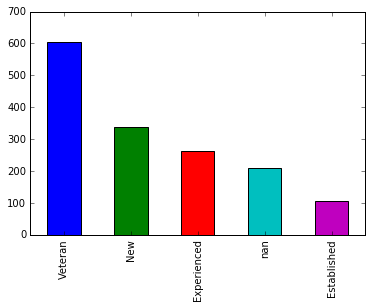

In [569]:
combined_updated["service_cat"].value_counts(dropna=False).plot(kind="bar")

The data cleaning step appears to be successful. We see that we have 1315 non-null values for the "institute_service" column in extracted_service_years, that equals to 1418 non-null values from combined_updated["institute_service"] minus the 103 "null" values in the same date, 1418-103=1315.

We observe that the majority of the employees are veteran according to our categorization. THe next category are New.

### Tramsform the age column
The age column in both data sources comes in a differnt format. The age groups are almost the same. There are the following differences between the two data:
* in TAFE there is "56 or older"
* in DETE there is "56-61" and "61 or older"
* in DETE "26-30" format and in TEFE both "26-30" and "26  30" formats.


In [570]:
tafe_survey_updated["age"].value_counts(dropna=False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: age, dtype: int64

In [571]:
dete_survey_updated["age"].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: age, dtype: int64

Transform the "age" columns and add them to combined_updated. We do the following changes in format:
* Age in the format "51-55"
* Combine 56-60 and 61 or older into 56 or older
* keep 56 or older and 20 or younger classifications

In [572]:
# transform dete ages
age_dete = dete_survey_updated["age"].str.strip().str.replace(r"\s+", " ").str.lower()
age_dete[age_dete == "56-60"] = "56 or older"
age_dete[age_dete == "61 or older"] = "56 or older"
age_dete = age_dete.str.replace(" ", "-")
# transform tafe ages
age_tafe = tafe_survey_updated["age"].str.strip().str.replace(r"\s+", " ").str.lower()
age_tafe = age_tafe.str.replace(" ", "-")
# 
age_combined = pd.concat([age_dete, age_tafe])
combined

,cease_date,institute_service,dissatisfied,age,institute
0,2012.0,28.0,True,56-or-older,DETE
1,2012.0,nan,False,56-or-older,DETE
2,2012.0,1.0,False,56-or-older,DETE
3,2012.0,7.0,False,36-40,DETE
4,2012.0,42.0,True,56-or-older,DETE
5,2012.0,18.0,True,41-45,DETE
6,2012.0,40.0,True,56-or-older,DETE
7,2012.0,24.0,False,56-or-older,DETE
8,2012.0,3.0,False,31-35,DETE
9,2012.0,15.0,True,46-50,DETE


## Analysis of Dissatisfaction
Now we proceed to analyze the dissatisfaction depending on how long the workers stayed on the institute.

In [573]:
combined_updated["dissatisfied"].value_counts(dropna=False)

False    769
True     490
NaN      265
Name: dissatisfied, dtype: int64

The most common sentiment among the employees that left was False, so they were not dissatisfied, 50% higher than True. The NaN values will be set to False, then due to lack of information. Moreover, we can assume that the fact that the employees did not answer implies that they were not dissatisfied.

In [574]:
combined_updated["dissatisfied"] = combined_updated["dissatisfied"].fillna(False)
combined_updated["dissatisfied"].value_counts(dropna=False)

False    1034
True      490
Name: dissatisfied, dtype: int64

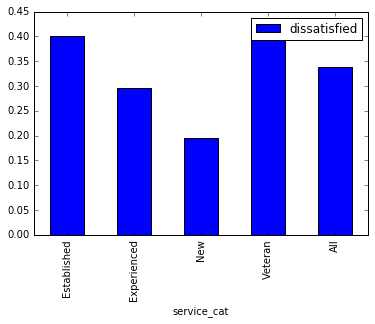

In [577]:
combined_updated.pivot_table(index="service_cat", values="dissatisfied",margins=True).plot(kind="bar")

We see that the most dissatisfied group are the Veterans forllowed by the Established, whereas the New are the least ones.

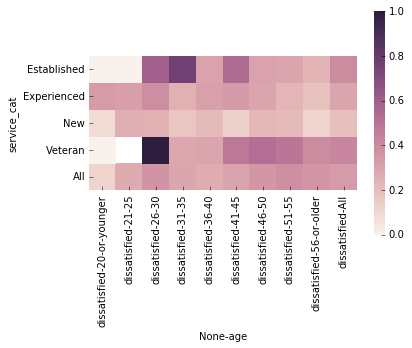

In [578]:
import seaborn.apionly as sns
piv = combined_updated.pivot_table(index=["service_cat"], columns=["age"], values=["dissatisfied"],margins=True)
sns.heatmap(piv, square=True)
plt.show()

In [579]:
piv

dissatisfied                                                    \
age         20-or-younger     21-25     26-30     31-35     36-40     41-45   
service_cat                                                                   
Established      0.000000  0.000000  0.600000  0.769231  0.307692  0.545455   
Experienced      0.333333  0.321429  0.390244  0.250000  0.320000  0.341463   
New              0.083333  0.254902  0.250000  0.170732  0.214286  0.127273   
Veteran          0.000000       NaN  1.000000  0.285714  0.294118  0.482759   
All              0.117647  0.271605  0.366337  0.292135  0.268041  0.301471   

                                                       
age             46-50     51-55 56-or-older       All  
service_cat                                            
Established  0.307692  0.300000    0.241379  0.401869  
Experienced  0.300000  0.230769    0.190476  0.295455  
New          0.225806  0.216216    0.120000  0.195266  
Veteran      0.526316  0.490385    0.400990  0.424293  
All          0.357143  0.384181    0.360000  0.337405

When we look also at the age of the employees, we see that there is a collective of employees, from 26-30, and established or veteran which have larger dissatisfaction. However looking at the percentages this just happens to be due to very low statistics to these rare groups. Most likely people who have worked their whole life in this company.